In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt


In [41]:
data = pd.read_csv("brca.csv")

In [42]:
data = data.dropna()
data = data.drop_duplicates()
X = data.drop('y', axis=1)
y = data['y']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
data

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,5,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,565,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.147400,0.2149,...,29.41,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873,M
565,566,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.138900,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115,M
566,567,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.097910,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637,M
567,568,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.053020,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820,M


In [43]:
data.dtypes

Unnamed: 0               int64
x.radius_mean          float64
x.texture_mean         float64
x.perimeter_mean       float64
x.area_mean            float64
x.smoothness_mean      float64
x.compactness_mean     float64
x.concavity_mean       float64
x.concave_pts_mean     float64
x.symmetry_mean        float64
x.fractal_dim_mean     float64
x.radius_se            float64
x.texture_se           float64
x.perimeter_se         float64
x.area_se              float64
x.smoothness_se        float64
x.compactness_se       float64
x.concavity_se         float64
x.concave_pts_se       float64
x.symmetry_se          float64
x.fractal_dim_se       float64
x.radius_worst         float64
x.texture_worst        float64
x.perimeter_worst      float64
x.area_worst           float64
x.smoothness_worst     float64
x.compactness_worst    float64
x.concavity_worst      float64
x.concave_pts_worst    float64
x.symmetry_worst       float64
x.fractal_dim_worst    float64
y                       object
dtype: o

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
classifiers = [
    LogisticRegression(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    SVC(),
    KNeighborsClassifier(),
    AdaBoostClassifier(),
    ExtraTreesClassifier()
]

# List to store model performance
model_names = []
performance = []

for classifier in classifiers:
    # Train the model
    classifier.fit(X_train_scaled, y_train)
    # Make predictions on the testing set
    predictions = classifier.predict(X_test_scaled)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictions)
    # Store model performance
    model_names.append(classifier.__class__.__name__)
    performance.append([accuracy, precision, recall, f1, roc_auc])


Result

+----------------------------+------------+-------------+----------+------------+-----------+
|                            |   Accuracy |   Precision |   Recall |   F1-Score |   ROC AUC |
|----------------------------+------------+-------------+----------+------------+-----------|
| LogisticRegression         |   0.991228 |       1     | 0.976744 |   0.988235 |  0.988372 |
| RandomForestClassifier     |   1        |       1     | 1        |   1        |  1        |
| GradientBoostingClassifier |   1        |       1     | 1        |   1        |  1        |
| SVC                        |   0.991228 |       1     | 0.976744 |   0.988235 |  0.988372 |
| KNeighborsClassifier       |   0.95614  |       0.975 | 0.906977 |   0.939759 |  0.946446 |
| AdaBoostClassifier         |   1        |       1     | 1        |   1        |  1        |
| ExtraTreesClassifier       |   0.982456 |       1     | 0.953488 |   0.97619  |  0.976744 |
+----------------------------+------------+--------

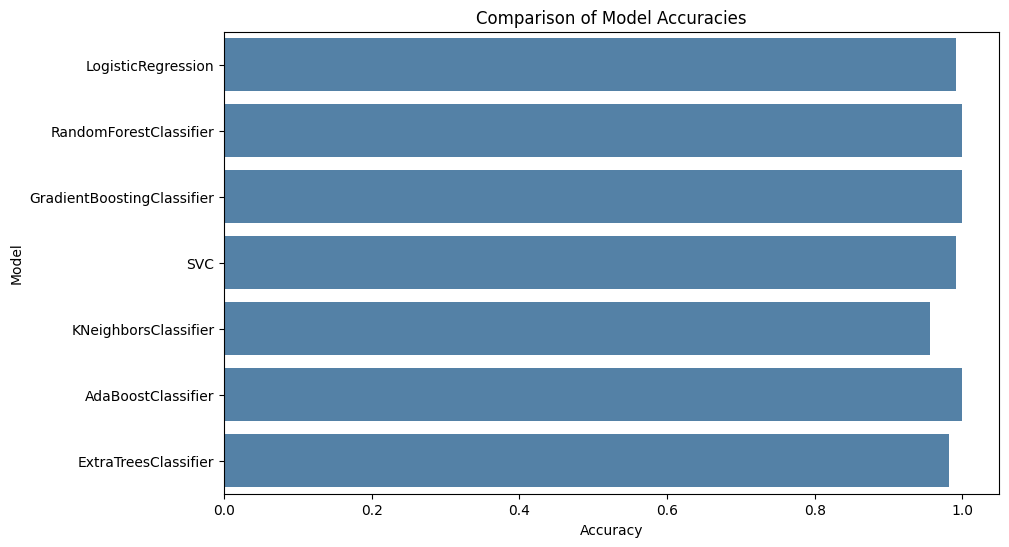

In [47]:
performance_df = pd.DataFrame(performance, columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'], index=model_names)

# Print model performance table
print(f'\nResult\n')
print(tabulate(performance_df, headers='keys', tablefmt='psql'))
print()

# Create a bar plot to compare model accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=performance_df['Accuracy'], y=performance_df.index, color='steelblue')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Comparison of Model Accuracies')
plt.show()

In [48]:
model = LogisticRegression().fit(X_train_scaled, y_train)

In [49]:
from joblib import load, dump
dump(model, 'logisticmodel.joblib')


['logisticmodel.joblib']

In [172]:

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.multioutput import MultiOutputClassifier


X = data[['x.radius_mean']] 
y = data[['x.radius_se', 'x.radius_worst']] 

label_encoders = {}
for column in y.columns:
    le = LabelEncoder()
    y[column] = le.fit_transform(y[column])
    label_encoders[column] = le

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

multi_output_model1 = MultiOutputClassifier(model)

multi_output_model1.fit(X_train, y_train)



predictions = multi_output_model1.predict([[12.05]])

decoded_predictions = pd.DataFrame(columns=y.columns)
for column in y.columns:
    le = label_encoders[column]
    decoded_predictions[column] = le.inverse_transform(predictions[:, list(y.columns).index(column)])

print(decoded_predictions)







C:\Users\Dhruv Kothari\AppData\Local\Temp\ipykernel_61864\2591712217.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[column] = le.fit_transform(y[column])
C:\Users\Dhruv Kothari\AppData\Local\Temp\ipykernel_61864\2591712217.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[column] = le.fit_transform(y[column])
C:\Users\Dhruv Kothari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: Co

   x.radius_se  x.radius_worst
0       0.2976            12.4


C:\Users\Dhruv Kothari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dhruv Kothari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Dhruv Kothari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8

In [173]:

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.multioutput import MultiOutputClassifier


X = data[['x.texture_mean']] 
y = data[['x.texture_se', 'x.texture_worst']] 

label_encoders = {}
for column in y.columns:
    le = LabelEncoder()
    y[column] = le.fit_transform(y[column])
    label_encoders[column] = le

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

multi_output_model2 = MultiOutputClassifier(model)

multi_output_model2.fit(X_train, y_train)



predictions = multi_output_model2.predict([[12.05]])

decoded_predictions = pd.DataFrame(columns=y.columns)
for column in y.columns:
    le = label_encoders[column]
    decoded_predictions[column] = le.inverse_transform(predictions[:, list(y.columns).index(column)])

print(decoded_predictions)







C:\Users\Dhruv Kothari\AppData\Local\Temp\ipykernel_61864\2759508843.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[column] = le.fit_transform(y[column])
C:\Users\Dhruv Kothari\AppData\Local\Temp\ipykernel_61864\2759508843.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[column] = le.fit_transform(y[column])
C:\Users\Dhruv Kothari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: Co

   x.texture_se  x.texture_worst
0        0.9053            15.77


C:\Users\Dhruv Kothari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dhruv Kothari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Dhruv Kothari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8

In [174]:

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.multioutput import MultiOutputClassifier


X = data[['x.perimeter_mean']] 
y = data[['x.perimeter_se', 'x.perimeter_worst']] 

label_encoders = {}
for column in y.columns:
    le = LabelEncoder()
    y[column] = le.fit_transform(y[column])
    label_encoders[column] = le

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

multi_output_model3 = MultiOutputClassifier(model)

multi_output_model3.fit(X_train, y_train)



predictions = multi_output_model3.predict([[12.05]])

decoded_predictions = pd.DataFrame(columns=y.columns)
for column in y.columns:
    le = label_encoders[column]
    decoded_predictions[column] = le.inverse_transform(predictions[:, list(y.columns).index(column)])

print(decoded_predictions)







C:\Users\Dhruv Kothari\AppData\Local\Temp\ipykernel_61864\79919228.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[column] = le.fit_transform(y[column])
C:\Users\Dhruv Kothari\AppData\Local\Temp\ipykernel_61864\79919228.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[column] = le.fit_transform(y[column])
C:\Users\Dhruv Kothari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: Conver

   x.perimeter_se  x.perimeter_worst
0           1.243              50.41


C:\Users\Dhruv Kothari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dhruv Kothari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Dhruv Kothari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8

In [175]:

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.multioutput import MultiOutputClassifier


X = data[['x.area_mean']] 
y = data[['x.area_se', 'x.area_worst']] 

label_encoders = {}
for column in y.columns:
    le = LabelEncoder()
    y[column] = le.fit_transform(y[column])
    label_encoders[column] = le

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

multi_output_model4 = MultiOutputClassifier(model)

multi_output_model4.fit(X_train, y_train)



predictions = multi_output_model4.predict([[12.05]])

decoded_predictions = pd.DataFrame(columns=y.columns)
for column in y.columns:
    le = label_encoders[column]
    decoded_predictions[column] = le.inverse_transform(predictions[:, list(y.columns).index(column)])

print(decoded_predictions)







C:\Users\Dhruv Kothari\AppData\Local\Temp\ipykernel_61864\818591601.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[column] = le.fit_transform(y[column])
C:\Users\Dhruv Kothari\AppData\Local\Temp\ipykernel_61864\818591601.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[column] = le.fit_transform(y[column])
C:\Users\Dhruv Kothari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: Conv

   x.area_se  x.area_worst
0      17.67         284.4


C:\Users\Dhruv Kothari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dhruv Kothari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Dhruv Kothari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8

In [176]:

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.multioutput import MultiOutputClassifier


X = data[['x.smoothness_mean']] 
y = data[['x.smoothness_se', 'x.smoothness_worst']] 

label_encoders = {}
for column in y.columns:
    le = LabelEncoder()
    y[column] = le.fit_transform(y[column])
    label_encoders[column] = le

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

multi_output_model5 = MultiOutputClassifier(model)

multi_output_model5.fit(X_train, y_train)



predictions = multi_output_model5.predict([[12.05]])

decoded_predictions = pd.DataFrame(columns=y.columns)
for column in y.columns:
    le = label_encoders[column]
    decoded_predictions[column] = le.inverse_transform(predictions[:, list(y.columns).index(column)])

print(decoded_predictions)







   x.smoothness_se  x.smoothness_worst
0             0.01              0.1347


C:\Users\Dhruv Kothari\AppData\Local\Temp\ipykernel_61864\3417423962.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[column] = le.fit_transform(y[column])
C:\Users\Dhruv Kothari\AppData\Local\Temp\ipykernel_61864\3417423962.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[column] = le.fit_transform(y[column])
C:\Users\Dhruv Kothari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does 

In [177]:

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.multioutput import MultiOutputClassifier


X = data[['x.compactness_mean']] 
y = data[['x.compactness_se', 'x.compactness_worst']] 

label_encoders = {}
for column in y.columns:
    le = LabelEncoder()
    y[column] = le.fit_transform(y[column])
    label_encoders[column] = le

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

multi_output_model6 = MultiOutputClassifier(model)

multi_output_model6.fit(X_train, y_train)



predictions = multi_output_model6.predict([[12.05]])

decoded_predictions = pd.DataFrame(columns=y.columns)
for column in y.columns:
    le = label_encoders[column]
    decoded_predictions[column] = le.inverse_transform(predictions[:, list(y.columns).index(column)])

print(decoded_predictions)







   x.compactness_se  x.compactness_worst
0           0.06835               0.6164


C:\Users\Dhruv Kothari\AppData\Local\Temp\ipykernel_61864\2531222561.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[column] = le.fit_transform(y[column])
C:\Users\Dhruv Kothari\AppData\Local\Temp\ipykernel_61864\2531222561.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[column] = le.fit_transform(y[column])
C:\Users\Dhruv Kothari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does 

In [178]:

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.multioutput import MultiOutputClassifier


X = data[['x.concavity_mean']] 
y = data[['x.concavity_se', 'x.concavity_worst']] 

label_encoders = {}
for column in y.columns:
    le = LabelEncoder()
    y[column] = le.fit_transform(y[column])
    label_encoders[column] = le

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

multi_output_model7 = MultiOutputClassifier(model)

multi_output_model7.fit(X_train, y_train)



predictions = multi_output_model7.predict([[12.05]])

decoded_predictions = pd.DataFrame(columns=y.columns)
for column in y.columns:
    le = label_encoders[column]
    decoded_predictions[column] = le.inverse_transform(predictions[:, list(y.columns).index(column)])

print(decoded_predictions)







   x.concavity_se  x.concavity_worst
0          0.1278             0.5803


C:\Users\Dhruv Kothari\AppData\Local\Temp\ipykernel_61864\498856891.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[column] = le.fit_transform(y[column])
C:\Users\Dhruv Kothari\AppData\Local\Temp\ipykernel_61864\498856891.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[column] = le.fit_transform(y[column])
C:\Users\Dhruv Kothari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does no

In [179]:

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.multioutput import MultiOutputClassifier


X = data[['x.concave_pts_mean']] 
y = data[['x.concave_pts_se', 'x.concave_pts_worst']] 

label_encoders = {}
for column in y.columns:
    le = LabelEncoder()
    y[column] = le.fit_transform(y[column])
    label_encoders[column] = le

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

multi_output_model8 = MultiOutputClassifier(model)

multi_output_model8.fit(X_train, y_train)



predictions = multi_output_model8.predict([[12.05]])

decoded_predictions = pd.DataFrame(columns=y.columns)
for column in y.columns:
    le = label_encoders[column]
    decoded_predictions[column] = le.inverse_transform(predictions[:, list(y.columns).index(column)])

print(decoded_predictions)







   x.concave_pts_se  x.concave_pts_worst
0           0.01843               0.2248


C:\Users\Dhruv Kothari\AppData\Local\Temp\ipykernel_61864\2325806789.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[column] = le.fit_transform(y[column])
C:\Users\Dhruv Kothari\AppData\Local\Temp\ipykernel_61864\2325806789.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[column] = le.fit_transform(y[column])
C:\Users\Dhruv Kothari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does 

In [180]:

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.multioutput import MultiOutputClassifier


X = data[['x.symmetry_mean']] 
y = data[['x.symmetry_se', 'x.symmetry_worst']] 

label_encoders = {}
for column in y.columns:
    le = LabelEncoder()
    y[column] = le.fit_transform(y[column])
    label_encoders[column] = le

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

multi_output_model9 = MultiOutputClassifier(model)

multi_output_model9.fit(X_train, y_train)



predictions = multi_output_model9.predict([[12.05]])

decoded_predictions = pd.DataFrame(columns=y.columns)
for column in y.columns:
    le = label_encoders[column]
    decoded_predictions[column] = le.inverse_transform(predictions[:, list(y.columns).index(column)])

print(decoded_predictions)







   x.symmetry_se  x.symmetry_worst
0        0.01798            0.3196


C:\Users\Dhruv Kothari\AppData\Local\Temp\ipykernel_61864\1392979072.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[column] = le.fit_transform(y[column])
C:\Users\Dhruv Kothari\AppData\Local\Temp\ipykernel_61864\1392979072.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[column] = le.fit_transform(y[column])
C:\Users\Dhruv Kothari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does 

In [182]:

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.multioutput import MultiOutputClassifier


X = data[['x.fractal_dim_mean']] 
y = data[['x.fractal_dim_se', 'x.fractal_dim_worst']] 

label_encoders = {}
for column in y.columns:
    le = LabelEncoder()
    y[column] = le.fit_transform(y[column])
    label_encoders[column] = le

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

multi_output_model10 = MultiOutputClassifier(model)

multi_output_model10.fit(X_train, y_train)



predictions = multi_output_model10.predict([[12.05]])

decoded_predictions = pd.DataFrame(columns=y.columns)
for column in y.columns:
    le = label_encoders[column]
    decoded_predictions[column] = le.inverse_transform(predictions[:, list(y.columns).index(column)])

print(decoded_predictions)







   x.fractal_dim_se  x.fractal_dim_worst
0          0.005667               0.1252


C:\Users\Dhruv Kothari\AppData\Local\Temp\ipykernel_61864\3022969926.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[column] = le.fit_transform(y[column])
C:\Users\Dhruv Kothari\AppData\Local\Temp\ipykernel_61864\3022969926.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[column] = le.fit_transform(y[column])
C:\Users\Dhruv Kothari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does 

In [185]:
from joblib import load, dump
dump(multi_output_model1, 'modelx1.joblib')
dump(multi_output_model2, 'modelx2.joblib')
dump(multi_output_model3, 'modelx3.joblib')
dump(multi_output_model4, 'modelx4.joblib')
dump(multi_output_model5, 'modelx5.joblib')
dump(multi_output_model6, 'modelx6.joblib')
dump(multi_output_model7, 'modelx7.joblib')
dump(multi_output_model8, 'modelx8.joblib')
dump(multi_output_model9, 'modelx9.joblib')
dump(multi_output_model10, 'modelx10.joblib')



['modelx10.joblib']

In [192]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

# Assuming 'data' is a DataFrame containing the required columns

# Extracting the features
a = data['x.radius_mean'].values.reshape(-1, 1)
b = data['x.radius_se'].values.reshape(-1, 1)
c = data['x.radius_worst'].values.reshape(-1, 1)

# Training the merged model
model_merged = MultiOutputRegressor(RandomForestRegressor())
model_merged.fit(a, (b, c))

# Predicting with the merged model
predictions = model_merged.predict(a)

# Printing the predictions
predictions_df = pd.DataFrame({'predictions_b': predictions[0], 'predictions_c': predictions[1]})
print(predictions_df)


ValueError: Found array with dim 3. MultiOutputRegressor expected <= 2.

In [196]:
# Extracting the features
a = data['x.radius_mean'].values.reshape(-1, 1)
b = data['x.radius_se'].values.reshape(-1, 1)
c = data['x.radius_worst'].values.reshape(-1, 1)

# Training the individual models
modelA1 = RandomForestRegressor()
modelA1.fit(a, b)

modelB1 = RandomForestRegressor()
modelB1.fit(a, c)

# Merging the models
class MergedModel:
    def __init__(self, modelA, modelB):
        self.modelA = modelA
        self.modelB = modelB
    
    def predict(self, x):
        predictions_b = self.modelA.predict(x)
        predictions_c = self.modelB.predict(x)
        return predictions_b, predictions_c

merged_model = MergedModel(modelA1, modelB1)

dump(multi_output_model1, 'model1.joblib')

''';predictions_b, predictions_c = merged_model.predict(a)

# Printing the predictions
predictions = pd.DataFrame({'predictions_b': predictions_b, 'predictions_c': predictions_c})
print(predictions)'''

C:\Users\Dhruv Kothari\AppData\Local\Temp\ipykernel_61864\3341571010.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelA1.fit(a, b)
C:\Users\Dhruv Kothari\AppData\Local\Temp\ipykernel_61864\3341571010.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelB1.fit(a, c)


";predictions_b, predictions_c = merged_model.predict(a)\n\n# Printing the predictions\npredictions = pd.DataFrame({'predictions_b': predictions_b, 'predictions_c': predictions_c})\nprint(predictions)"

In [ ]:
# Extracting the features
a = data['x.radius_mean'].values.reshape(-1, 1)
b = data['x.radius_se'].values.reshape(-1, 1)
c = data['x.radius_worst'].values.reshape(-1, 1)

# Training the individual models
modelA1 = RandomForestRegressor()
modelA1.fit(a, b)

modelB1 = RandomForestRegressor()
modelB1.fit(a, c)

# Merging the models
class MergedModel:
    def __init__(self, modelA, modelB):
        self.modelA = modelA
        self.modelB = modelB
    
    def predict(self, x):
        predictions_b = self.modelA.predict(x)
        predictions_c = self.modelB.predict(x)
        return predictions_b, predictions_c

merged_model = MergedModel(modelA1, modelB1)

dump(multi_output_model1, 'model1.joblib')

In [ ]:
# Extracting the features
a = data['x.radius_mean'].values.reshape(-1, 1)
b = data['x.radius_se'].values.reshape(-1, 1)
c = data['x.radius_worst'].values.reshape(-1, 1)

# Training the individual models
modelA1 = RandomForestRegressor()
modelA1.fit(a, b)

modelB1 = RandomForestRegressor()
modelB1.fit(a, c)

# Merging the models
class MergedModel:
    def __init__(self, modelA, modelB):
        self.modelA = modelA
        self.modelB = modelB
    
    def predict(self, x):
        predictions_b = self.modelA.predict(x)
        predictions_c = self.modelB.predict(x)
        return [predictions_b, predictions_c]

merged_model = MergedModel(modelA1, modelB1)

dump(multi_output_model1, 'model1.joblib')

In [ ]:
# Extracting the features
a = data['x.radius_mean'].values.reshape(-1, 1)
b = data['x.radius_se'].values.reshape(-1, 1)
c = data['x.radius_worst'].values.reshape(-1, 1)

# Training the individual models
modelA1 = RandomForestRegressor()
modelA1.fit(a, b)

modelB1 = RandomForestRegressor()
modelB1.fit(a, c)

# Merging the models
class MergedModel:
    def __init__(self, modelA, modelB):
        self.modelA = modelA
        self.modelB = modelB
    
    def predict(self, x):
        predictions_b = self.modelA.predict(x)
        predictions_c = self.modelB.predict(x)
        return predictions_b, predictions_c

merged_model = MergedModel(modelA1, modelB1)

dump(multi_output_model1, 'model1.joblib')

In [ ]:
# Extracting the features
a = data['x.radius_mean'].values.reshape(-1, 1)
b = data['x.radius_se'].values.reshape(-1, 1)
c = data['x.radius_worst'].values.reshape(-1, 1)

# Training the individual models
modelA1 = RandomForestRegressor()
modelA1.fit(a, b)

modelB1 = RandomForestRegressor()
modelB1.fit(a, c)

# Merging the models
class MergedModel:
    def __init__(self, modelA, modelB):
        self.modelA = modelA
        self.modelB = modelB
    
    def predict(self, x):
        predictions_b = self.modelA.predict(x)
        predictions_c = self.modelB.predict(x)
        return predictions_b, predictions_c

merged_model = MergedModel(modelA1, modelB1)

dump(multi_output_model1, 'model1.joblib')

In [ ]:
# Extracting the features
a = data['x.radius_mean'].values.reshape(-1, 1)
b = data['x.radius_se'].values.reshape(-1, 1)
c = data['x.radius_worst'].values.reshape(-1, 1)

# Training the individual models
modelA1 = RandomForestRegressor()
modelA1.fit(a, b)

modelB1 = RandomForestRegressor()
modelB1.fit(a, c)

# Merging the models
class MergedModel:
    def __init__(self, modelA, modelB):
        self.modelA = modelA
        self.modelB = modelB
    
    def predict(self, x):
        predictions_b = self.modelA.predict(x)
        predictions_c = self.modelB.predict(x)
        return predictions_b, predictions_c

merged_model = MergedModel(modelA1, modelB1)

dump(multi_output_model1, 'model1.joblib')

In [ ]:
# Extracting the features
a = data['x.radius_mean'].values.reshape(-1, 1)
b = data['x.radius_se'].values.reshape(-1, 1)
c = data['x.radius_worst'].values.reshape(-1, 1)

# Training the individual models
modelA1 = RandomForestRegressor()
modelA1.fit(a, b)

modelB1 = RandomForestRegressor()
modelB1.fit(a, c)

# Merging the models
class MergedModel:
    def __init__(self, modelA, modelB):
        self.modelA = modelA
        self.modelB = modelB
    
    def predict(self, x):
        predictions_b = self.modelA.predict(x)
        predictions_c = self.modelB.predict(x)
        return predictions_b, predictions_c

merged_model = MergedModel(modelA1, modelB1)

dump(multi_output_model1, 'model1.joblib')

In [ ]:
# Extracting the features
a = data['x.radius_mean'].values.reshape(-1, 1)
b = data['x.radius_se'].values.reshape(-1, 1)
c = data['x.radius_worst'].values.reshape(-1, 1)

# Training the individual models
modelA1 = RandomForestRegressor()
modelA1.fit(a, b)

modelB1 = RandomForestRegressor()
modelB1.fit(a, c)

# Merging the models
class MergedModel:
    def __init__(self, modelA, modelB):
        self.modelA = modelA
        self.modelB = modelB
    
    def predict(self, x):
        predictions_b = self.modelA.predict(x)
        predictions_c = self.modelB.predict(x)
        return predictions_b, predictions_c

merged_model = MergedModel(modelA1, modelB1)

dump(multi_output_model1, 'model1.joblib')